In [2]:
import pandas as pd 
import numpy as np
import re

C:\Users\deivi\AppData\Local\Temp\ipykernel_1336\3479914720.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
file_path ="C:\\Users\deivi\Downloads\GSAF5.csv"
data = pd.read_csv(file_path)
data.head(20)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,04-Feb-2024,2024.0,Provoked,TRINIDAD,NaN,NaN,Spearfishing,male,M,NaN,...,Blacktip reef shark,"Trinidad Guardian, 2/11/2014",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,29 Jan-2024,2024.0,Unprovoked,AUSTRALIA,New South Wales,"Elizabeth Bay, Sydney Harbor",Swimming,Lauren O'Neill,F,29,...,Bull shark,"Nine News, 12/31/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,15 Jan-2024,2024.0,Unprovoked,BAHAMAS,Paradise Island,Paradise Island Resort,Swimming,male,M,10,...,NaN,"Caribbean Loop News, 1/15;2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,09-Jan-2024,2024.0,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Surfing,Murray Adams,M,64,...,White shark,"A. Currie, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,05-Jan-2024,2024.0,Provoked,SOUTH AFRICA,Eastern Cape Province,Papiesfontein,Fishing,male,M,62,...,Raggedtooth shark,Jacaranda fm. 12/6/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,30 Dec-2023,2023.0,Unprovoked,USA,Hawaii,"Baby Beach, Maui",Surfing,Jason Carter,M,39,...,NaN,"Surfer, 12/31/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6968 entries, 0 to 6967
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6943 non-null   object 
 1   Year            6941 non-null   float64
 2   Type            6925 non-null   object 
 3   Country         6893 non-null   object 
 4   State           6461 non-null   object 
 5   Location        6378 non-null   object 
 6   Activity        6357 non-null   object 
 7   Name            6723 non-null   object 
 8   Sex             6364 non-null   object 
 9   Age             3949 non-null   object 
 10  Injury          6908 non-null   object 
 11  Unnamed: 11     6382 non-null   object 
 12  Time            3417 non-null   object 
 13  Species         3811 non-null   object 
 14  Source          6924 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6819 non-null   object 
 17  href            6796 non-null   o

Date                25
Year                27
Type                43
Country             75
State              507
Location           590
Activity           611
Name               245
Sex                604
Age               3019
Injury              60
Unnamed: 11        586
Time              3551
Species           3157
Source              44
pdf                169
href formula       149
href               172
Case Number        170
Case Number.1      171
original order     169
Unnamed: 21       6967
Unnamed: 22       6966
dtype: int64

In [5]:
unique_date_formats = data['Date'].dropna().unique()
sample_date_formats = unique_date_formats[:10] if len(unique_date_formats) > 10 else unique_date_formats
sample_date_formats
unique_date_formats_original = data['Date'].dropna().unique()
sample_date_formats_original = unique_date_formats_original[:10] if len(unique_date_formats_original) > 10 else unique_date_formats_original
sample_date_formats_original
data['Parsed Date'] = pd.to_datetime(data['Date'], errors='coerce')
nat_entries = data[data['Parsed Date'].isna()]['Date'].unique()
nat_entries_sample = nat_entries[:10] if len(nat_entries) > 10 else nat_entries
nat_entries_sample, len(nat_entries)
unique_date_formats_original = data['Date'].dropna().unique()
sample_date_formats_original = unique_date_formats_original[:10] if len(unique_date_formats_original) > 10 else unique_date_formats_original
sample_date_formats_original
data['Parsed Date'] = pd.to_datetime(data['Date'], errors='coerce')
nat_entries = data[data['Parsed Date'].isna()]['Date'].unique()
nat_entries_sample = nat_entries[:10] if len(nat_entries) > 10 else nat_entries
nat_entries_sample, len(nat_entries)

(array(['02 Mar-2024', '25 Feb-2024', '14 Feb-2024', '04-Feb-2024',
        '29 Jan-2024', '15 Jan-2024', '09-Jan-2024', '05-Jan-2024',
        '30 Dec-2023', '29 Dec-2023'], dtype=object),
 5963)

In [6]:
import re
def standardize_date_format(date_str):
    if pd.isna(date_str):
        return date_str 
    date_str = date_str.strip()
    date_str = re.sub(r'\W+', ' ', date_str)
    return pd.to_datetime(date_str, errors='coerce')
data['Standardized Parsed Date'] = data['Date'].apply(standardize_date_format)
remaining_nat_entries = data[data['Standardized Parsed Date'].isna()]['Date'].unique()
remaining_nat_count = len(remaining_nat_entries)
remaining_nat_entries_sample = remaining_nat_entries[:10] if len(remaining_nat_entries) > 10 else remaining_nat_entries
remaining_nat_entries_sample, remaining_nat_count



(array(['Reported 02 Nov-2023', 'Reported 06-Sep-2023',
        'Reported 14 Jul-2023', 'Reported 14-June 2023',
        'Reported 27-Apr-2022', 'Reported 10-Feb-2022',
        'Reported 06-Dec-2021', '15-Nox-2021', 'Reported 11-Jul-2021',
        '10-Jul-202'], dtype=object),
 792)

In [7]:

def preprocess_and_standardize_date(date_str):
    if pd.isna(date_str):
        return date_str
    date_str = date_str.replace('Reported ', '').replace('Nox', 'Nov')
    date_str = date_str.strip()
    date_str = re.sub(r'\W+', ' ', date_str)
    return pd.to_datetime(date_str, errors='coerce')


data['Extended Standardized Date'] = data['Date'].apply(preprocess_and_standardize_date)
remaining_nat_entries_extended = data[data['Extended Standardized Date'].isna()]['Date'].unique()
remaining_nat_count_extended = len(remaining_nat_entries_extended)
remaining_nat_entries_extended_sample = remaining_nat_entries_extended[:10] if len(remaining_nat_entries_extended) > 10 else remaining_nat_entries_extended
remaining_nat_entries_extended_sample, remaining_nat_count_extended


(array(['10-Jul-202', 'Jun-1018', '190Feb-2010', 'Late Jul-2008',
        'Fall 2008', 'Summer-2008', '19-Jul-2007.b', '19-Jul-2007.a',
        'Early Aug-2006',
        ' 19-Jul-2004 Reported to have happened  "on the weekend"'],
       dtype=object),
 248)

In [8]:
data.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22,Parsed Date,Standardized Parsed Date,Extended Standardized Date
0,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-04,2024-03-04,2024-03-04
1,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-03-02,2024-03-02
2,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-02-25,2024-02-25
3,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-02-14,2024-02-14
4,04-Feb-2024,2024.0,Provoked,TRINIDAD,NaN,NaN,Spearfishing,male,M,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-02-04,2024-02-04


In [9]:

data['Extended Standardized Date'].fillna("unknown", inplace=True)
data['Extended Standardized Date'] = data['Extended Standardized Date'].apply(lambda x: x.strftime('%Y-%m-%d') if not pd.isna(x) and x != "unknown" else x)
data.drop(columns=['Date'], inplace=True)
data.rename(columns={'Extended Standardized Date': 'Date'}, inplace=True)
data.head()



C:\Users\deivi\AppData\Local\Temp\ipykernel_1336\2910078154.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Extended Standardized Date'].fillna("unknown", inplace=True)
C:\Users\deivi\AppData\Local\Temp\ipykernel_1336\2910078154.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data['Extended Standardized Date'].fillna("unknown"

,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,...,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22,Parsed Date,Standardized Parsed Date,Date
0,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-04,2024-03-04,2024-03-04
1,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-03-02,2024-03-02
2,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-02-25,2024-02-25
3,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-02-14,2024-02-14
4,2024.0,Provoked,TRINIDAD,NaN,NaN,Spearfishing,male,M,NaN,Shoulder bitten,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-02-04,2024-02-04


In [10]:
data['Date'].unique()

array(['2024-03-04', '2024-03-02', '2024-02-25', ..., '1703-03-26',
       '1691-01-01', '2003-01-01'], dtype=object)

In [11]:
columns_correct_order = ['Date'] + [col for col in data.columns if col != 'Date']
data = data[columns_correct_order]
data.columns.tolist()



['Date',
 'Year',
 'Type',
 'Country',
 'State',
 'Location',
 'Activity',
 'Name',
 'Sex',
 'Age',
 'Injury',
 'Unnamed: 11',
 'Time',
 'Species ',
 'Source',
 'pdf',
 'href formula',
 'href',
 'Case Number',
 'Case Number.1',
 'original order',
 'Unnamed: 21',
 'Unnamed: 22',
 'Parsed Date',
 'Standardized Parsed Date']

In [12]:
data.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22,Parsed Date,Standardized Parsed Date
0,2024-03-04,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-04,2024-03-04
1,2024-03-02,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-03-02
2,2024-02-25,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-02-25
3,2024-02-14,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-02-14
4,2024-02-04,2024.0,Provoked,TRINIDAD,NaN,NaN,Spearfishing,male,M,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-02-04


In [13]:
nan_percentage = data.isna().mean() * 100
nan_percentage

Date                         0.000000
Year                         0.387486
Type                         0.617107
Country                      1.076349
State                        7.276119
Location                     8.467279
Activity                     8.768657
Name                         3.516073
Sex                          8.668197
Age                         43.326636
Injury                       0.861079
Unnamed: 11                  8.409874
Time                        50.961538
Species                     45.307118
Source                       0.631458
pdf                          2.425373
href formula                 2.138347
href                         2.468427
Case Number                  2.439724
Case Number.1                2.454076
original order               2.425373
Unnamed: 21                 99.985649
Unnamed: 22                 99.971297
Parsed Date                 99.842135
Standardized Parsed Date    12.787026
dtype: float64

In [14]:
columns_to_drop = ['Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22','Unnamed: 11','Parsed Date','Standardized Parsed Date']
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')  
remaining_columns = data.columns
remaining_columns



Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Time', 'Species '],
      dtype='object')

In [15]:
duplicates_count = data.duplicated().sum()
duplicates_count


26

In [16]:
df = data.drop_duplicates()
new_duplicates_count = df.duplicated().sum()
new_duplicates_count


0

In [17]:
def clean_age(age):
    if pd.isna(age) or age.strip() in ["", "!", "!!", "?", "MAKE LINE GREEN", "X", "\xa0 "]:
        return None  
    if age.isdigit():
        return int(age)  
    if age.replace(" ", "").replace("'", "").isdigit():
       
        return int(age.replace(" ", "").replace("'", ""))
   
    nums = [int(s) for s in age.replace("'", "").split() if s.isdigit()]
    if nums:
        return sum(nums) / len(nums) 
    if "teen" in age.lower() or "young" in age.lower():
        return 15 
    if "elderly" in age.lower():
        return 70 
    if "adult" in age.lower():
        return 30 
    if "child" in age.lower() or "minor" in age.lower():
        return 10  
    return None 

df.loc[:, 'Cleaned_Age'] = df['Age'].apply(clean_age)
cleaned_unique_ages = sorted(df.loc[df['Cleaned_Age'].notna(), 'Cleaned_Age'].unique())
cleaned_unique_ages


C:\Users\deivi\AppData\Local\Temp\ipykernel_1336\2818195266.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Cleaned_Age'] = df['Age'].apply(clean_age)


[1.0,
 2.5,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 7.5,
 8.0,
 9.0,
 9.5,
 10.0,
 10.5,
 11.0,
 12.0,
 12.5,
 13.0,
 13.5,
 14.0,
 15.0,
 15.5,
 16.0,
 16.5,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 21.5,
 22.0,
 23.0,
 23.5,
 24.0,
 24.5,
 25.0,
 26.0,
 26.5,
 27.0,
 28.0,
 29.0,
 29.5,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 34.5,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 77.0,
 78.0,
 81.0,
 82.0,
 84.0,
 86.0,
 87.0]

In [18]:

mean_age = df['Cleaned_Age'].mean()
df['Cleaned_Age'].fillna(mean_age, inplace=True)
missing_values_after_filling = df['Cleaned_Age'].isnull().sum()

(mean_age, missing_values_after_filling)
df.head()


C:\Users\deivi\AppData\Local\Temp\ipykernel_1336\2993323893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cleaned_Age'].fillna(mean_age, inplace=True)
C:\Users\deivi\AppData\Local\Temp\ipykernel_1336\2993323893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_Age'].fillna(mean_age, inplace=True)


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species,Cleaned_Age
0,2024-03-04,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",NaN,Tiger shark 8',27.914675
1,2024-03-02,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark,11.000000
2,2024-02-25,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,11h30,Tiger shark,46.000000
3,2024-02-14,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'",32.000000
4,2024-02-04,2024.0,Provoked,TRINIDAD,NaN,NaN,Spearfishing,male,M,NaN,Shoulder bitten,06h30,Blacktip reef shark,27.914675


In [19]:
df['Sex'].isnull().sum()

580

In [20]:
df['Sex'].unique()

array(['M', 'F', nan, ' M', 'M ', 'lli', 'M x 2', 'N', '.'], dtype=object)

In [21]:
df.to_csv(r'C:\Users\deivi\Downloads\datacleaned.csv')

In [22]:
df = data.drop('Age', axis=1)
df = df.dropna(subset=['Type', 'Country'])
df['State'] = df['State'].fillna("Unknown")
df['Sex'] = df['Sex'].fillna("Unknown")
df['Sex'] = df['Sex'].str.strip()  # Trim whitespace
df['Sex'] = df['Sex'].replace({'lli': 'Unknown', 'M x 2': 'M', 'N': 'Unknown', '.': 'Unknown'})
summary_after_cleaning_df = {
    'Remaining Rows': len(df),
    'Unique Sex Values': df['Sex'].unique(),
    'Missing Values per Column': df.isnull().sum()
}

summary_after_cleaning_df


{'Remaining Rows': 6875,
 'Unique Sex Values': array(['M', 'F', 'Unknown'], dtype=object),
 'Missing Values per Column': Date           0
 Year           2
 Type           0
 Country        0
 State          0
 Location     525
 Activity     575
 Name         216
 Sex            0
 Injury        33
 Time        3473
 Species     3083
 dtype: int64}

In [23]:
df=df.drop(['Species '],axis=1)


In [24]:
df=df.drop(["Time"],axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6875 entries, 0 to 6942
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      6875 non-null   object 
 1   Year      6873 non-null   float64
 2   Type      6875 non-null   object 
 3   Country   6875 non-null   object 
 4   State     6875 non-null   object 
 5   Location  6350 non-null   object 
 6   Activity  6300 non-null   object 
 7   Name      6659 non-null   object 
 8   Sex       6875 non-null   object 
 9   Injury    6842 non-null   object 
dtypes: float64(1), object(9)
memory usage: 590.8+ KB


In [26]:

df['Location'] = df['Location'].fillna("Unknown")
df['Activity'] = df['Activity'].fillna("Unknown")
df['Name'] = df['Name'].fillna("Unknown")


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6875 entries, 0 to 6942
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      6875 non-null   object 
 1   Year      6873 non-null   float64
 2   Type      6875 non-null   object 
 3   Country   6875 non-null   object 
 4   State     6875 non-null   object 
 5   Location  6875 non-null   object 
 6   Activity  6875 non-null   object 
 7   Name      6875 non-null   object 
 8   Sex       6875 non-null   object 
 9   Injury    6842 non-null   object 
dtypes: float64(1), object(9)
memory usage: 590.8+ KB


In [28]:
df.to_csv(r'C:\Users\deivi\Downloads\datacleaned2.csv')

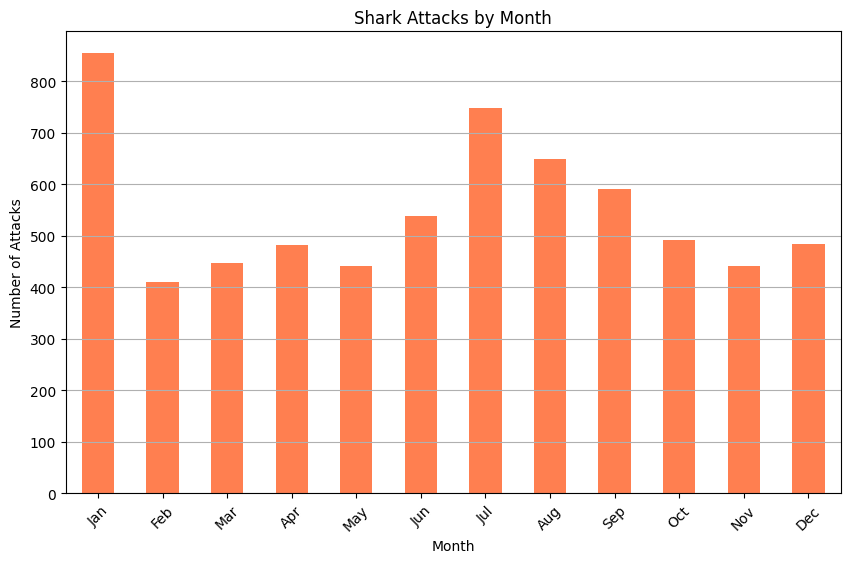

Month
1.0     854
2.0     410
3.0     448
4.0     482
5.0     441
6.0     539
7.0     748
8.0     650
9.0     591
10.0    491
11.0    442
12.0    484
dtype: int64

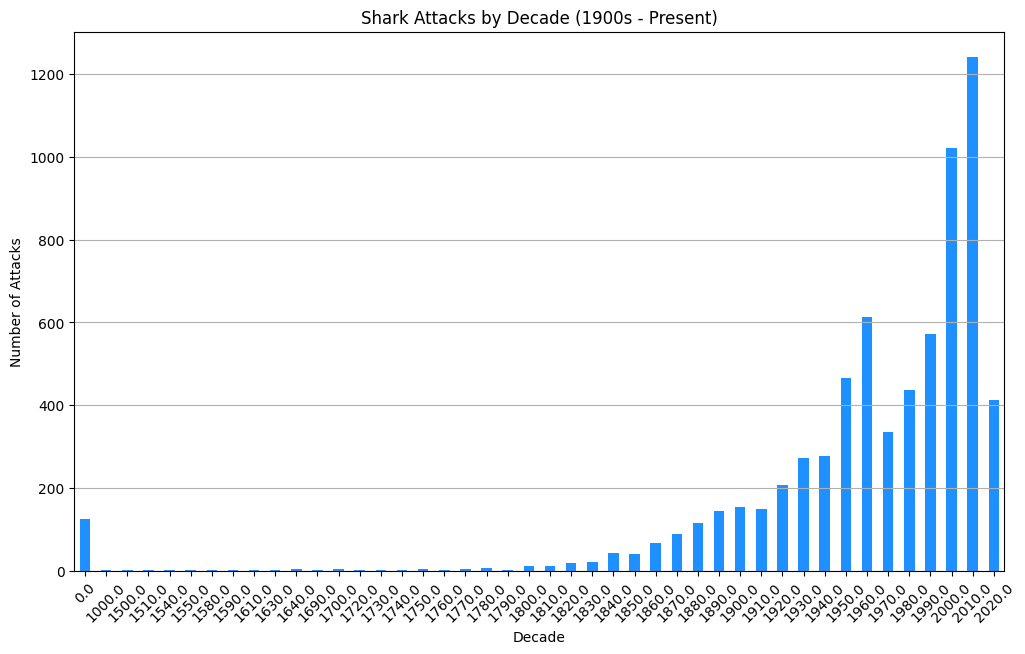

Decade
0.0        124
1000.0       1
1500.0       1
1510.0       1
1540.0       1
1550.0       1
1580.0       1
1590.0       1
1610.0       1
1630.0       1
1640.0       3
1690.0       1
1700.0       4
1720.0       2
1730.0       2
1740.0       2
1750.0       4
1760.0       2
1770.0       4
1780.0       6
1790.0       2
1800.0      10
1810.0      10
1820.0      17
1830.0      20
1840.0      43
1850.0      40
1860.0      67
1870.0      88
1880.0     114
1890.0     145
1900.0     153
1910.0     148
1920.0     206
1930.0     272
1940.0     277
1950.0     465
1960.0     614
1970.0     334
1980.0     437
1990.0     572
2000.0    1022
2010.0    1241
2020.0     413
dtype: int64

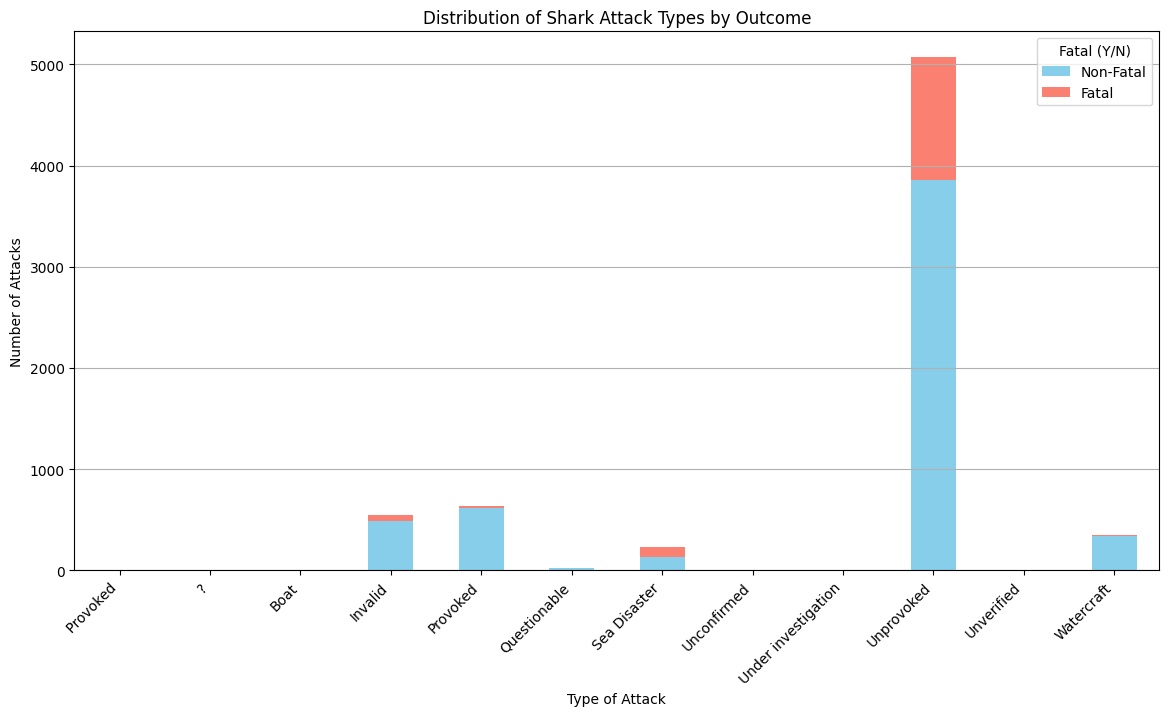

Fatal (Y/N),N,Y
Type,,
Provoked,1,1
?,1,0
Boat,7,0
Invalid,491,56
Provoked,617,15
Questionable,20,2
Sea Disaster,130,104
Unconfirmed,1,0
Under investigation,1,0


Sex
M          5526
F           771
Unknown     578
Name: count, dtype: int64

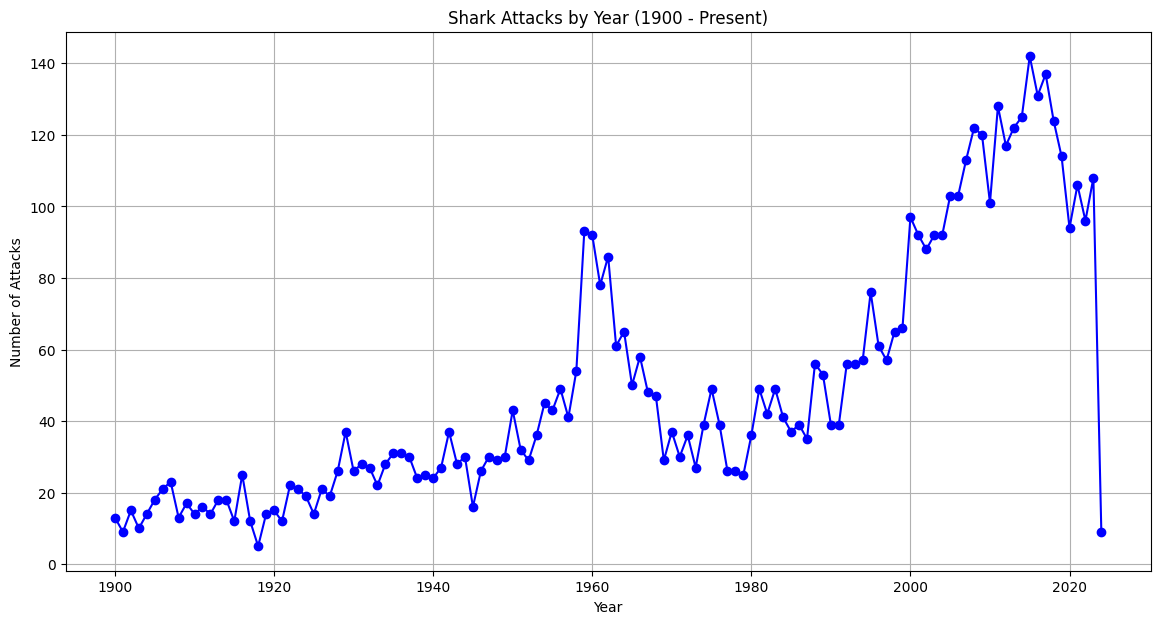

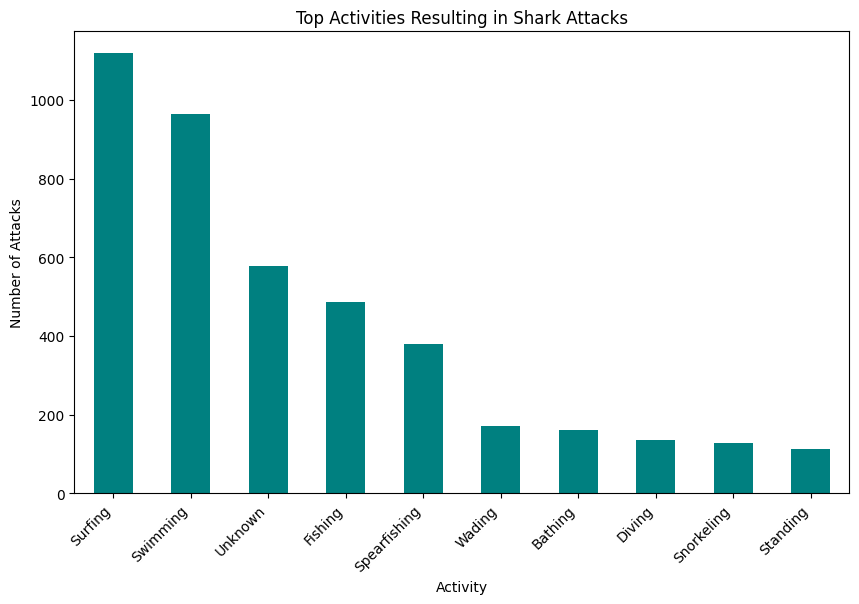

Activity
Surfing         1118
Swimming         965
Unknown          578
Fishing          487
Spearfishing     380
Wading           172
Bathing          161
Diving           136
Snorkeling       129
Standing         113
Name: count, dtype: int64

In [31]:

activity_frequency = data['Activity'].value_counts()


country_frequency = data['Country'].value_counts()


injury_types = data['Injury'].value_counts().head(10)


yearly_incidents = data.groupby('Year').size()

gender_distribution = data['Sex'].value_counts()

(activity_frequency, country_frequency, injury_types, yearly_incidents, gender_distribution)


(Activity
 Surfing                                                        1121
 Swimming                                                        975
 Fishing                                                         488
 Spearfishing                                                    382
 Wading                                                          174
                                                                ... 
 Fishing boat swamped in a storm                                   1
 Free diving (but on surface)                                      1
 Adrift after the sinking of the motor yacht Princess Dianne       1
 Free diving for abalone (submerged)                               1
 Wreck of  large double sailing canoe                              1
 Name: count, Length: 1587, dtype: int64,
 Country
 USA                   2538
 AUSTRALIA             1480
 SOUTH AFRICA           597
 NEW ZEALAND            144
 BAHAMAS                136
                       ... 
 PUERTO RICO

In [32]:


top_activities = activity_frequency.head(5)


top_countries = country_frequency.head(5)

data_fatal_activities = data[data['Injury'] == 'FATAL']
fatal_activities_percentage = data_fatal_activities['Activity'].value_counts().reindex(top_activities.index, fill_value=0) / top_activities * 100

fatal_countries_percentage = data_fatal_activities['Country'].value_counts().reindex(top_countries.index, fill_value=0) / top_countries * 100

(top_activities, top_countries, fatal_activities_percentage, fatal_countries_percentage)


(Activity
 Surfing         1121
 Swimming         975
 Fishing          488
 Spearfishing     382
 Wading           174
 Name: count, dtype: int64,
 Country
 USA             2538
 AUSTRALIA       1480
 SOUTH AFRICA     597
 NEW ZEALAND      144
 BAHAMAS          136
 Name: count, dtype: int64,
 Activity
 Surfing          4.192685
 Swimming        21.538462
 Fishing          5.737705
 Spearfishing     5.759162
 Wading           2.873563
 Name: count, dtype: float64,
 Country
 USA              4.334121
 AUSTRALIA       12.297297
 SOUTH AFRICA     8.040201
 NEW ZEALAND     11.805556
 BAHAMAS          7.352941
 Name: count, dtype: float64)

In [34]:


top_injury_types = data[data['Injury'] != 'FATAL']['Injury'].value_counts().head(5)


trends_recent_years = yearly_incidents.tail(10)

gender_specific_analysis = data.groupby('Sex')['Injury'].value_counts().unstack().fillna(0)

(top_injury_types, trends_recent_years, gender_specific_analysis)


(Injury
 Foot bitten         100
 Survived             97
 No injury            85
 Leg bitten           81
 Left foot bitten     53
 Name: count, dtype: int64,
 Year
 2015.0    143
 2016.0    131
 2017.0    139
 2018.0    124
 2019.0    114
 2020.0    101
 2021.0    109
 2022.0     98
 2023.0    108
 2024.0      9
 dtype: int64,
 Injury  Laceration to lower leg  \
 Sex                               
  M                          1.0   
 .                           0.0   
 F                           0.0   
 M                           2.0   
 M                           0.0   
 M x 2                       0.0   
 N                           0.0   
 lli                         0.0   
 
 Injury  Remains of 3 humans recovered from shark, but shark involvement prior to death unconfirmed  \
 Sex                                                                                                  
  M                                                    0.0                                          

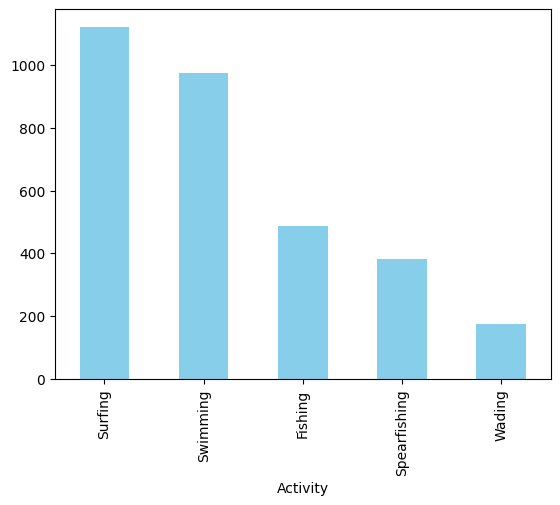

In [39]:


import matplotlib.pyplot as plt




top_activities.plot(kind='bar',  color='skyblue')
ax[0, 0].set_title('Top 5 Activities with Shark Incidents')
ax[0, 0].set_ylabel('Number of Incidents')
ax[0, 0].set_xlabel('Activity')


plt.show()


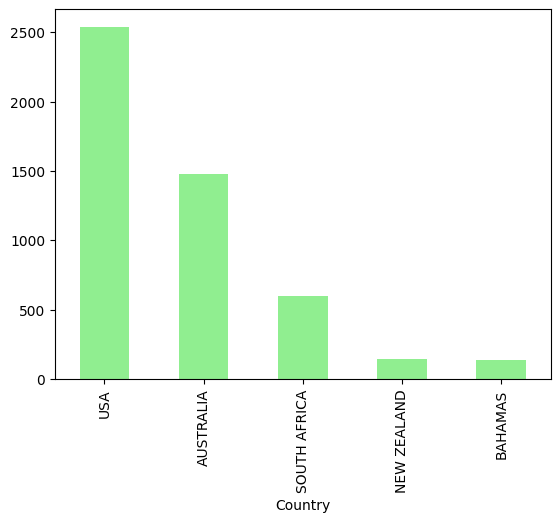

In [41]:

top_countries.plot(kind='bar',  color='lightgreen')
ax[0, 1].set_title('Top 5 Countries with Shark Incidents')
ax[0, 1].set_ylabel('Number of Incidents')
ax[0, 1].set_xlabel('Country')

plt.show()

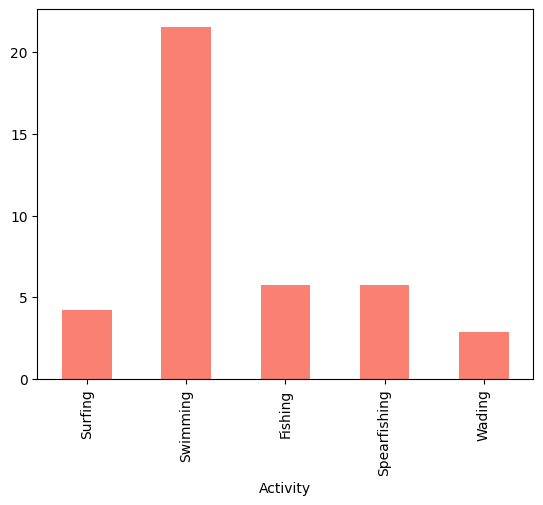

In [42]:
fatal_activities_percentage.plot(kind='bar',  color='salmon')
ax[1, 0].set_title('Percentage of Fatal Incidents by Activity')
ax[1, 0].set_ylabel('Percentage (%)')
ax[1, 0].set_xlabel('Activity')

plt.show()

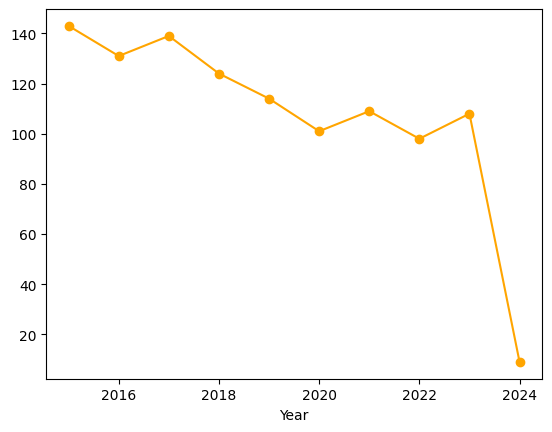

In [43]:
trends_recent_years.plot(kind='line', marker='o', color='orange')
ax[1, 1].set_title('Trends of Shark Incidents Over the Last Decade')
ax[1, 1].set_ylabel('Number of Incidents')
ax[1, 1].set_xlabel('Year')
plt.show()